# **04 - Feature Engineering**

## Objectives
* Engineer features to improve the predictive power of the dataset and prepare it for building a regression model to predict house prices.
* Handle missing values, outliers, and skewness to ensure data integrity and consistency.
* Encode categorical variables and transform numerical variables to optimize them for regression modeling.
* Identify and remove multicollinear features to enhance model interpretability and performance.
* Ensure all variables are scaled and ready for regression modeling.

## Inputs
* Train set: `outputs/datasets/cleaned/train_set.parquet`
* Test set: `outputs/datasets/cleaned/test_set.parquet`
* Both datasets are used to ensure consistent feature engineering across training and testing phases.

## Outputs
* A list of final features selected for the regression model.
* Train and test sets with engineered features.
* Documentation of the transformations applied to variables and their impact on the dataset.


---

## Change Working Directory

Ensure the working directory is set to the project root for consistent file paths. This ensures that all file paths work correctly, regardless of where the notebook is executed.

In [ ]:
import os
current_dir = os.getcwd()
current_dir

'd:\\Projects'

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [ ]:
current_dir = os.getcwd()
current_dir

'd:\\'

## 1. Load Clean Data and Data Profiling

We load the cleaned datasets (`train_set.parquet` and `test_set.parquet`) to ensure they are ready for feature engineering. This step is crucial to verify that the data is clean, consistent, and free from issues such as missing values, which could negatively impact the modeling process.

### Purpose:
* Ensure the datasets are properly loaded and accessible for feature engineering.
* Identify and handle any remaining missing values to maintain data integrity.
* Confirm the structure and size of the datasets to validate their readiness for further processing.

### Datasets:
* Train Set: `train_set.parquet` - Used for training the regression model.
* Test Set: `test_set.parquet` - Used for evaluating the model's performance on unseen data.

#### 1.1.1 Train Set

In [68]:
# Import Pandas for data manipulation
import pandas as pd

# Create DataFrame of cleaned training dataset and display the first five rows
TrainSet = pd.read_parquet("outputs/datasets/cleaned/train_set.parquet")
TrainSet.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1068,0.0,3.0,No,663,GLQ,396,264,RFn,1963.0,...,8414,70.0,0.0,0,8,6,1059,1963,2003,154500
1,1500,0.0,3.0,Av,1032,GLQ,431,712,RFn,1994.0,...,12256,98.0,362.0,32,5,8,1463,1994,1995,325000
2,1028,0.0,2.0,No,0,Unf,1008,360,Unf,1927.0,...,8960,56.0,0.0,0,6,5,1008,1927,1950,115000
3,1004,0.0,3.0,No,399,ALQ,605,420,None,1950.0,...,5000,50.0,0.0,24,7,6,1004,1947,1950,159000
4,1620,0.0,2.0,Gd,1022,GLQ,598,912,Fin,2008.0,...,12898,89.0,70.0,0,5,9,1620,2007,2008,315500


#### 1.1.2 Test Set

In [48]:
# Load the cleaned test dataset and display the first five rows
TestSet = pd.read_parquet("outputs/datasets/cleaned/test_set.parquet")
TestSet.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1068,0.0,3.0,No,663,GLQ,396,264,RFn,1963.0,...,8414,70.0,0.0,0,8,6,1059,1963,2003,154500
1,1500,0.0,3.0,Av,1032,GLQ,431,712,RFn,1994.0,...,12256,98.0,362.0,32,5,8,1463,1994,1995,325000
2,1028,0.0,2.0,No,0,Unf,1008,360,Unf,1927.0,...,8960,56.0,0.0,0,6,5,1008,1927,1950,115000
3,1004,0.0,3.0,No,399,ALQ,605,420,None,1950.0,...,5000,50.0,0.0,24,7,6,1004,1947,1950,159000
4,1620,0.0,2.0,Gd,1022,GLQ,598,912,Fin,2008.0,...,12898,89.0,70.0,0,5,9,1620,2007,2008,315500


### 1.2 Check Datasets for Missing Values

In [69]:
# Check Train Set for missing values and display results
print(f"TrainSet has: {TrainSet.isnull().sum()} missing values.")

# Check Test Set for missing values and display results
print(f"TestSet has: {TestSet.isnull().sum()} missing values.")

TrainSet has: 1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64 missing values.
TestSet has: 1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64 missing values.


### 1.3 Data Profiling for Exploratory Data Analysis (EDA)

*Note: We are only processing `TrainSet` at this stage.*

In [50]:
# Import Ydata Profiling
from ydata_profiling import ProfileReport

# Generate a profile report for the training set
profile = ProfileReport(df=TrainSet, minimal=True)

# Display the profile report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 22/22 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

## 2. Feature Engineering

*Note: This code was inspired by feature engineering in Walkthrough Project 2: Churnometer.*

### 2.1 Create Custom Function

Feature engineering is a critical step to enhance the predictive power of the dataset. We use a modular approach to systematically handle outliers, apply transformations to improve variable distributions, and encode categorical variables. This ensures the dataset is optimized for regression modeling.

In [ ]:
# Import libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import statistical functions from the SciPy library for advanced statistical analysis
import scipy.stats as stats

# Import warnings
import warnings

# Import Feature Engine
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import LogTransformer, PowerTransformer, BoxCoxTransformer, YeoJohnsonTransformer, ReciprocalTransformer

# Enable inline plotting
%matplotlib inline

# Set theme style
sns.set(style="darkgrid")

# Ignore warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Define feature engineering analysis function
def FeatureEngineeringAnalysis(df, analysis_type=None):
    """"
    Used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape.
    Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions.
    """
    # Check for missing values
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop through each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # Create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers to respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng

# Check analysis type
def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")

# Check for missing values in the dataset
def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")

# Set suffix columns according to analysis_type
def define_list_column_transformers(analysis_type):

    # Define the list of column transformers based on the analysis type
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]
    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]
    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers

# Apply transformations based on the analysis type.
def apply_transformers(analysis_type, df_feat_eng, column):

    # Convert categorical columns to 'object' type
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')
    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)
    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)
    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers

# Evaluate transformations for each variable.
def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    print(f"*** Variable Analyzed: {column}")
    print(f"*** Applied transformation: {list_applied_transformers} \n")

    # Display diagnostic plots
    for col in [column] + list_applied_transformers:
        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")

# Categorical plots diagnostics.
def DiagnosticPlots_Categories(df_feat_eng, col):
    if col not in df_feat_eng.columns:
        raise ValueError(f"Column {col} is not a valid column in the DataFrame.")
    
    unique_categories = len(df_feat_eng[col].unique())
    palette = sns.color_palette("Spectral", n_colors=unique_categories)

    # Countplot
    plt.figure(figsize=(8, 4))
    sns.countplot(
        data=df_feat_eng,
        x=col,
        palette=palette,
        order=df_feat_eng[col].value_counts().index
    )
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=20, y=1.05)
    plt.show()

# Numerical plots diagnostics.
def DiagnosticPlots_Numerical(df, variable):
    """Plot diagnostics for numerical variables."""
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df,
                x=variable,
                kde=True,
                element="step",
                ax=axes[0],
                color=sns.color_palette("Spectral")[0]
    )
    axes[0].set_title('Histogram', fontsize=8)

    # QQ-Plot
    stats.probplot(
        df[variable],
        dist="norm",
        plot=axes[1],
    )
    if len(axes[1].get_lines()) >= 2:
        axes[1].get_lines()[0].set_color(sns.color_palette("Spectral")[4])
        axes[1].get_lines()[1].set_color('black')
    axes[1].set_title('QQ Plot', fontsize=9)

    # Boxplot
    sns.boxplot(
        x=df[variable],
        ax=axes[2], 
        color=sns.color_palette("Spectral")[1]
    )    
    axes[2].set_title('Boxplot', fontsize=9)

    # Save the figure and show the plot
    fig.suptitle(f"{variable}", fontsize=20, y=1.05)
    plt.tight_layout()
    plt.show()

# Apply ordinal encoding to categorical variable.
def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

# Apply Winsorization to handle outliers.
def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

# Apply numerical transformations.
def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

### 2.2  Applying Feature Engineering

Next we will apply feature engineering techniques to prepare the `TrainSet` for modeling. This includes categorical encoding, numerical transformation and smart correlation selections.

#### Data Types to Engineer:
* Categorical 
* Numerical
* Outlier
* Smart Correlation Selection

#### Steps:
1. **Define variables**: Selecting categorical variables to be encoded.
2. **Create new dataframe**: Create new dataframe with only the selected variables.
3. **Feature Engineering and Visualization**: Feature engineer selected variables and visualize diagnostic plots.
4. **Apply transformation**: Apply transformation on Train and Test Set.

#### 2.2.1 Categorical Encoding
Machine learning models require numerical inputs, so categorical variables are encoded using ordinal encoding. This method preserves the order of categories, which is important for variables like `GarageFinish` and `KitchenQual` that have a natural hierarchy.


In [52]:
# Define the variables to be engineered and display them
variables_engineering = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
variables_engineering

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

In [53]:
# Create separate DataFrame with selected variables
df_engineering = TrainSet[variables_engineering].copy()

# Display the first few rows of the new dataframe
df_engineering.head(3)

,BsmtExposure,BsmtFinType1,GarageFinish,KitchenQual
0,No,Rec,RFn,TA
1,No,Unf,RFn,TA
2,No,Unf,None,TA


*** Variable Analyzed: 2ndFlrSF
*** Applied transformation: [] 



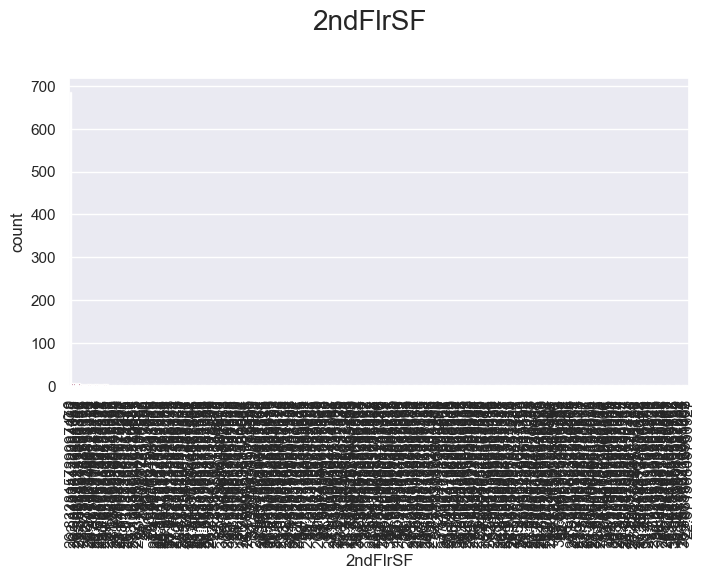



*** Variable Analyzed: BedroomAbvGr
*** Applied transformation: [] 



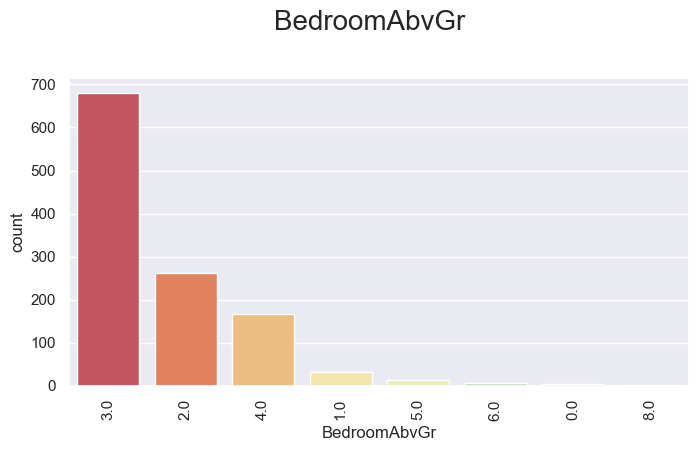



*** Variable Analyzed: BsmtExposure
*** Applied transformation: [] 



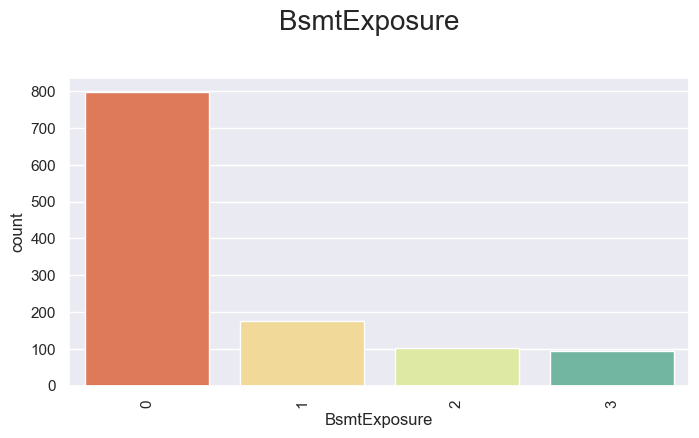



*** Variable Analyzed: BsmtFinSF1
*** Applied transformation: [] 



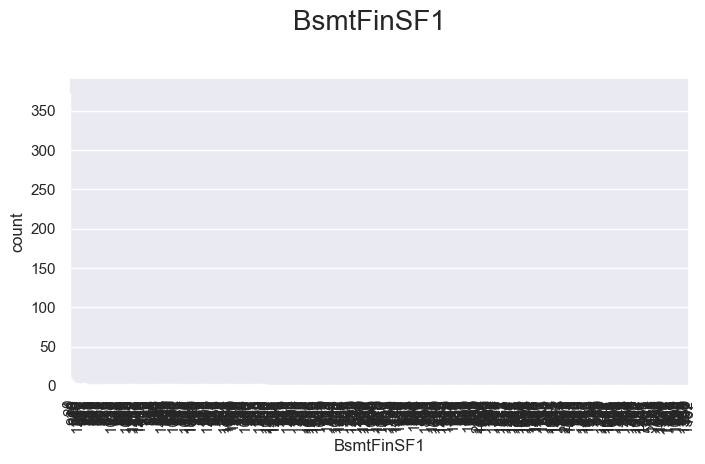



*** Variable Analyzed: BsmtFinType1
*** Applied transformation: [] 



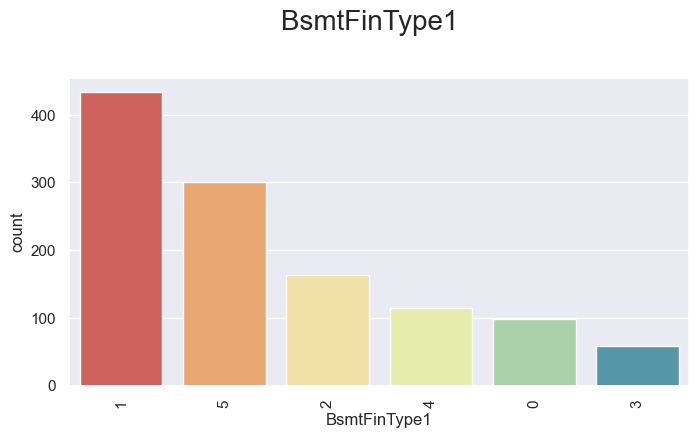



*** Variable Analyzed: BsmtUnfSF
*** Applied transformation: [] 



KeyboardInterrupt: 

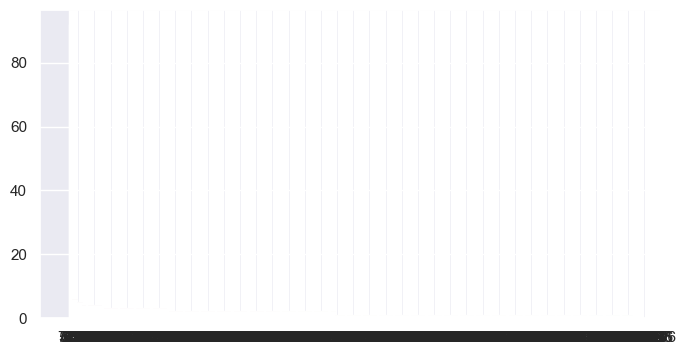

In [70]:
# Encode categorical variables and display diagnostic plots
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='ordinal_encoder')

In [55]:
# Perform categorical encoding on selected variables
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=variables_engineering)

# Fit and transform the training set, transform the test set
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

# Display confirmation message
print("*** Categorical encoding - ordinal transformation done!")

*** Categorical encoding - ordinal transformation done!


#### 2.2.2 Numerical Transformation

In [56]:
# Select the variables to be engineered and display them
variables_engineering = [
    '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'LotArea',
    'LotFrontage', 'GarageArea', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF'
    ]
variables_engineering

['1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'GarageArea',
 'MasVnrArea',
 'OpenPorchSF',
 'TotalBsmtSF']

In [57]:
# Create separate DataFrame with selected variables
df_engineering = TrainSet[variables_engineering].copy()

# Display the first three rows of the new dataframe
df_engineering.head(3)

,1stFlrSF,2ndFlrSF,GrLivArea,LotArea,LotFrontage,GarageArea,MasVnrArea,OpenPorchSF,TotalBsmtSF
0,1314,0.0,1314,8400,70.0,294,0.0,0,1314
1,799,772.0,1571,7837,59.0,380,0.0,40,799
2,796,0.0,796,8777,67.0,0,0.0,0,796


Call `FeatureEngineeringAnalysis` function to apply numerical transformations to the selected variables.

*** Variable Analyzed: 2ndFlrSF
*** Applied transformation: ['2ndFlrSF_power', '2ndFlrSF_yeo_johnson'] 



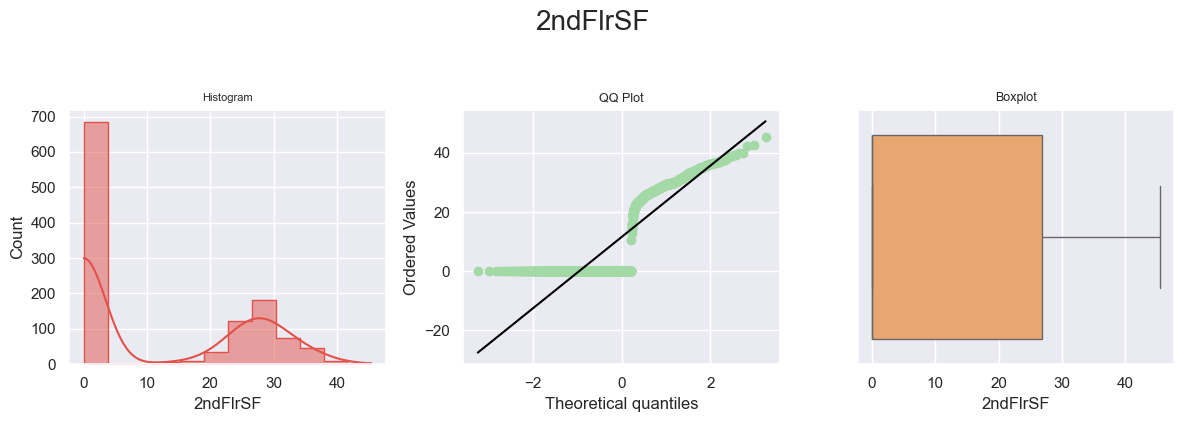

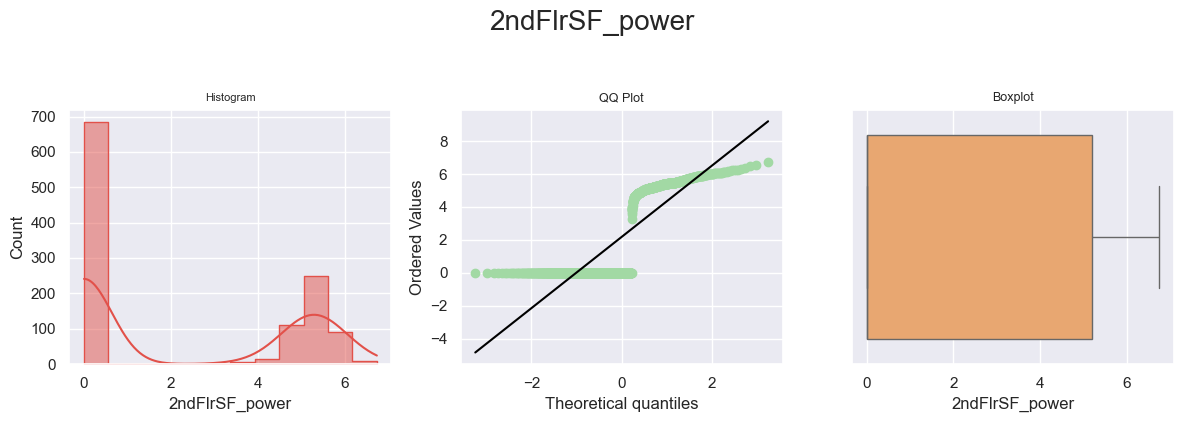

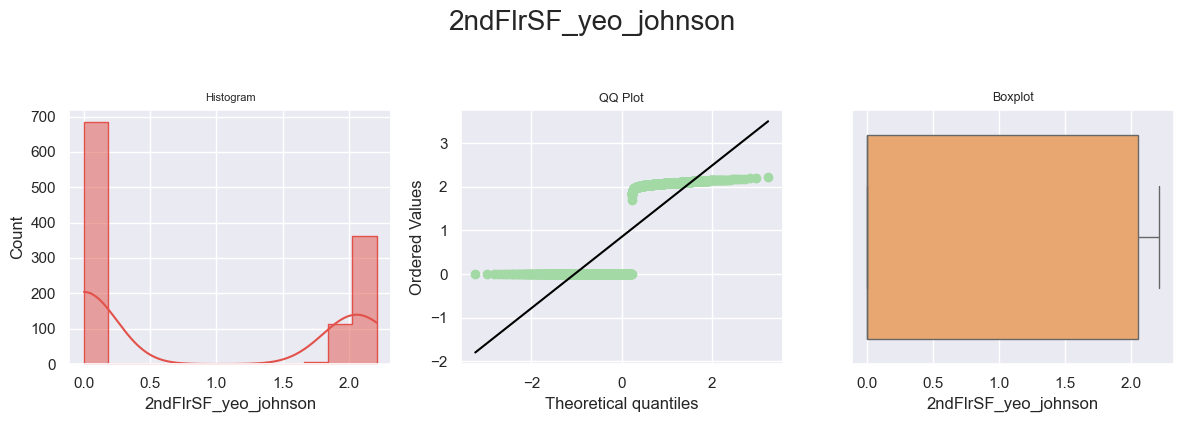



*** Variable Analyzed: BedroomAbvGr
*** Applied transformation: ['BedroomAbvGr_power', 'BedroomAbvGr_yeo_johnson'] 



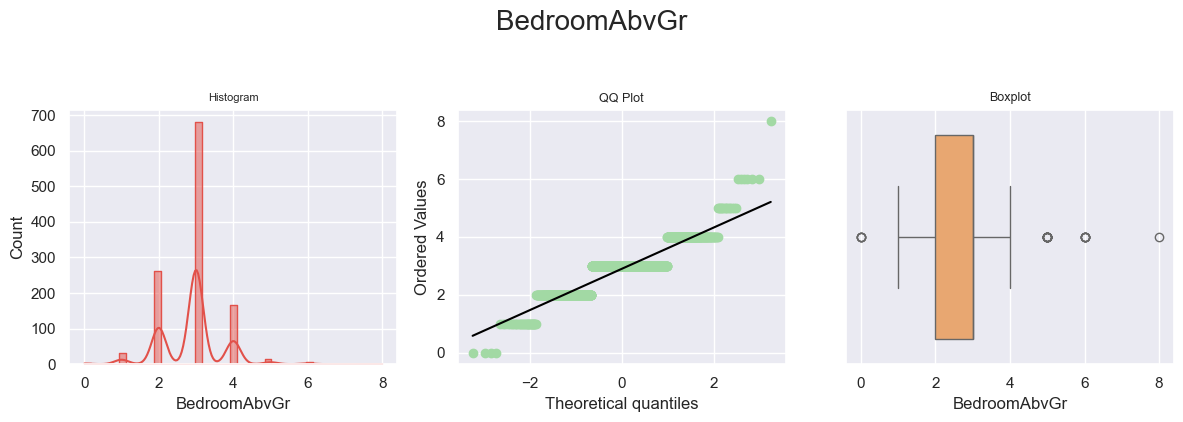

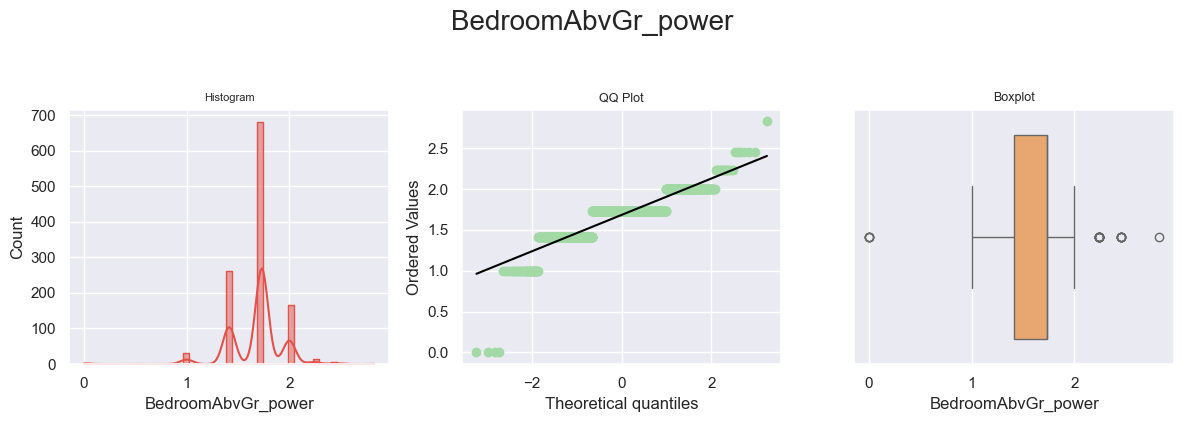

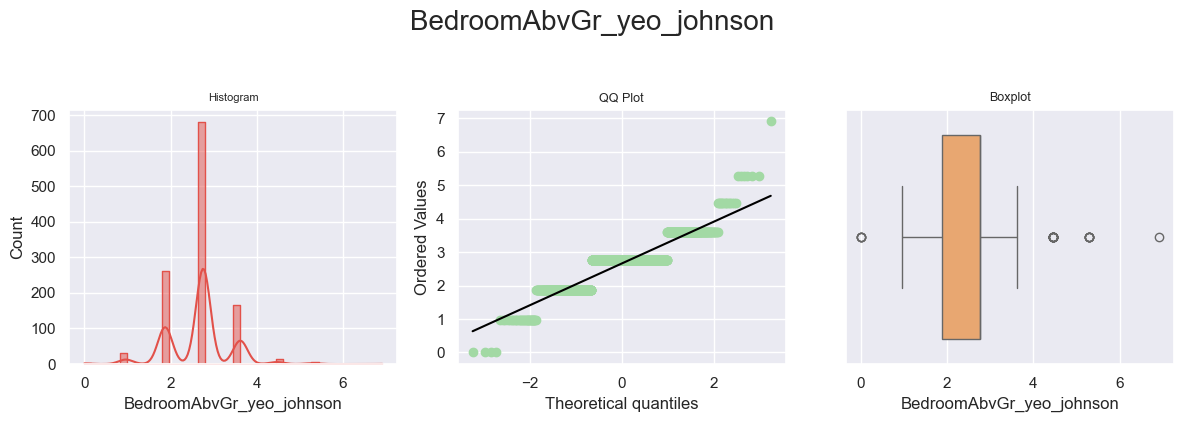



*** Variable Analyzed: BsmtExposure
*** Applied transformation: ['BsmtExposure_power', 'BsmtExposure_yeo_johnson'] 



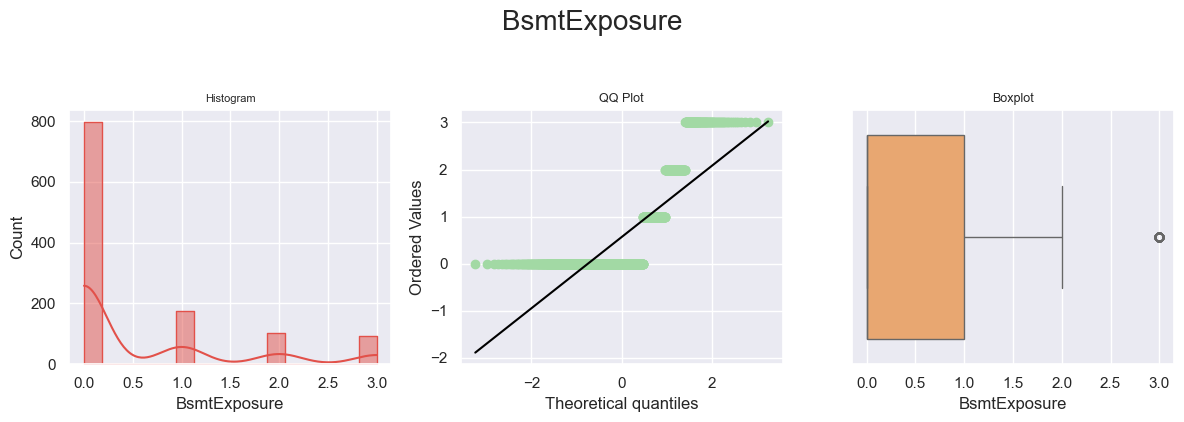

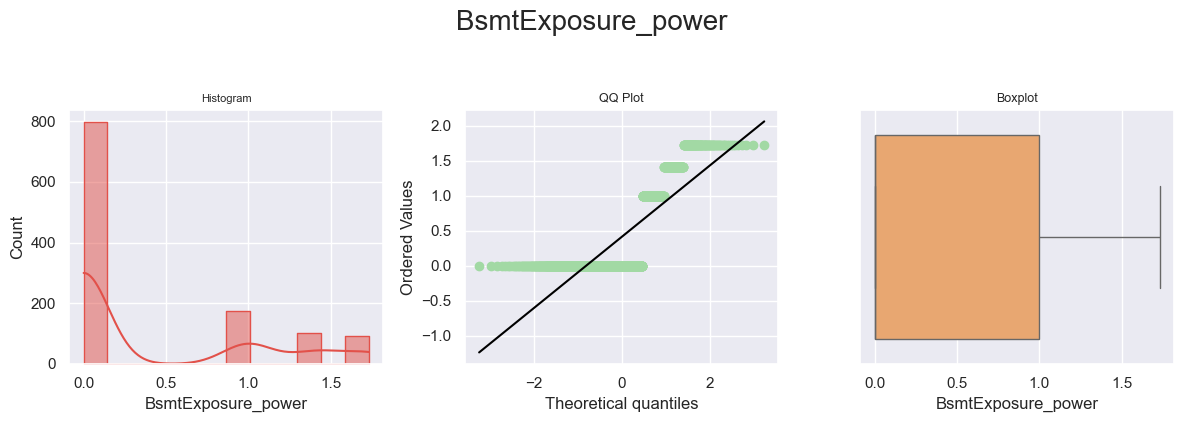

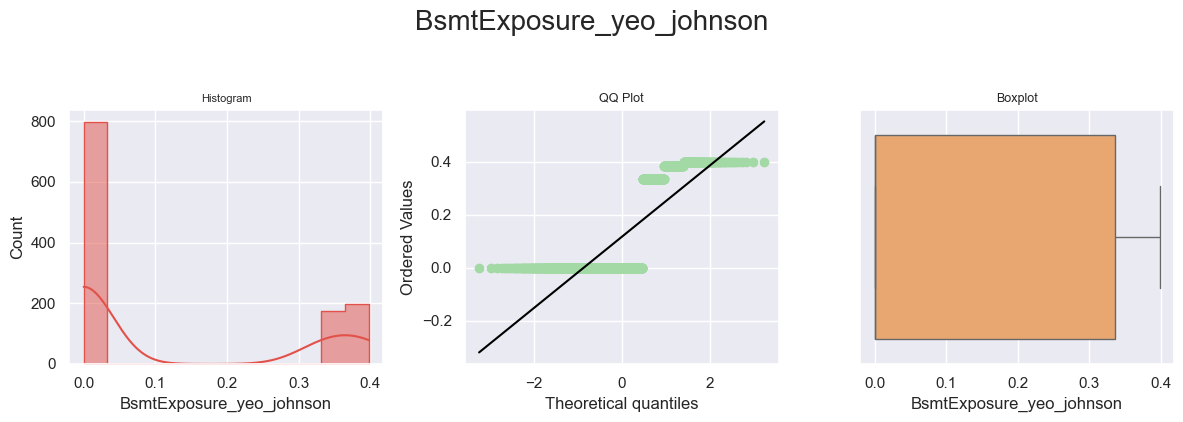



*** Variable Analyzed: BsmtFinSF1
*** Applied transformation: ['BsmtFinSF1_power', 'BsmtFinSF1_yeo_johnson'] 



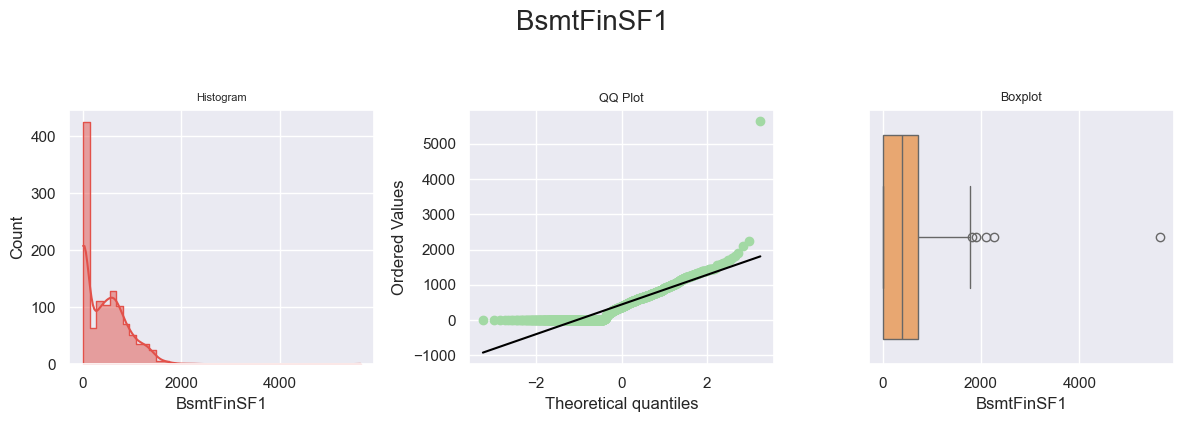

KeyboardInterrupt: 

In [71]:
# Perform numerical transformation and display diagnostic plots
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

##### 2.2.1 Reduce skweness
Log and power transformations are applied to reduce skewness and stabilize variance in numerical variables. This improves the model's ability to learn patterns from the data and ensures consistent scaling across features.

In [59]:
# Create log and power transformers for selected variables
lt = LogTransformer(variables=['GrLivArea', 'LotArea', 'LotFrontage'])
pt = PowerTransformer(variables=['GarageArea', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'])

# Create a list of transformers
transformers = [lt, pt]
for t in transformers:
    # Fit and transform the training set, transform the test set
    TrainSet = t.fit_transform(TrainSet)
    TestSet = t.transform(TestSet)

# Display confirmation message
print("*** Numerical transformation done!")

*** Numerical transformation done!


#### 2.2.3 Winsorization
Outliers can distort model performance by introducing noise. Winsorization caps extreme values to a specified range, reducing their impact while preserving the overall distribution of the data.

### Results
The diagnostic plots show that Winsorization successfully reduced the impact of extreme values in variables like `GarageArea` and `MasVnrArea`, while maintaining the overall shape of the distribution.

In [60]:
# Select the variables to be engineered and display them
variables_engineering = [
    'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea',
    'OpenPorchSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'
    ]
variables_engineering

['GarageArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF']

In [61]:
# Create separate DataFrame with the selected variables
df_engineering = TrainSet[variables_engineering].copy()

# Display the first three rows of the new dataframe
df_engineering.head(3)

,GarageArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,17.146428,9.035987,4.248495,0.0,0.000000,36.249138,36.249138,0.000000
1,19.493589,8.966611,4.077537,0.0,6.324555,28.266588,28.266588,27.784888
2,0.000000,9.079890,4.204693,0.0,0.000000,28.213472,28.213472,0.000000


*** Variable Analyzed: GarageArea
*** Applied transformation: ['GarageArea_iqr'] 



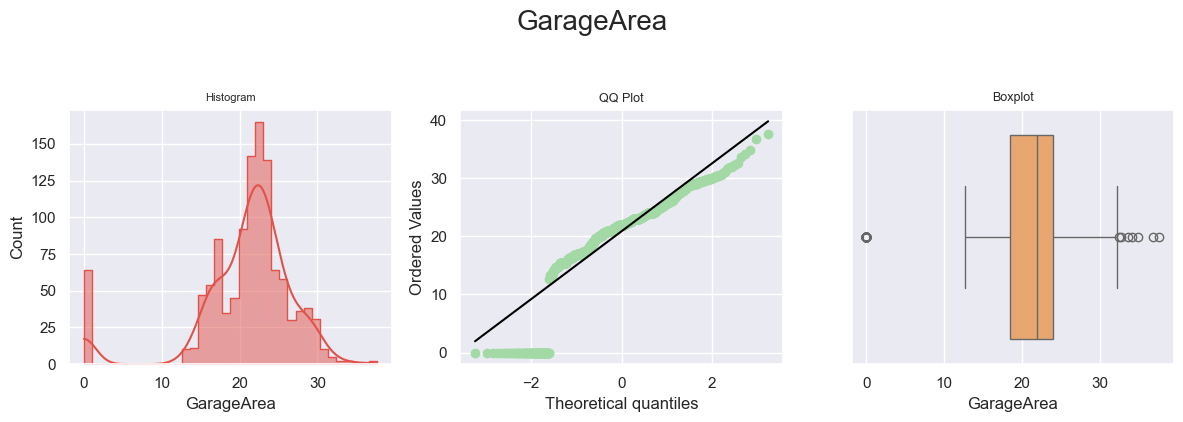

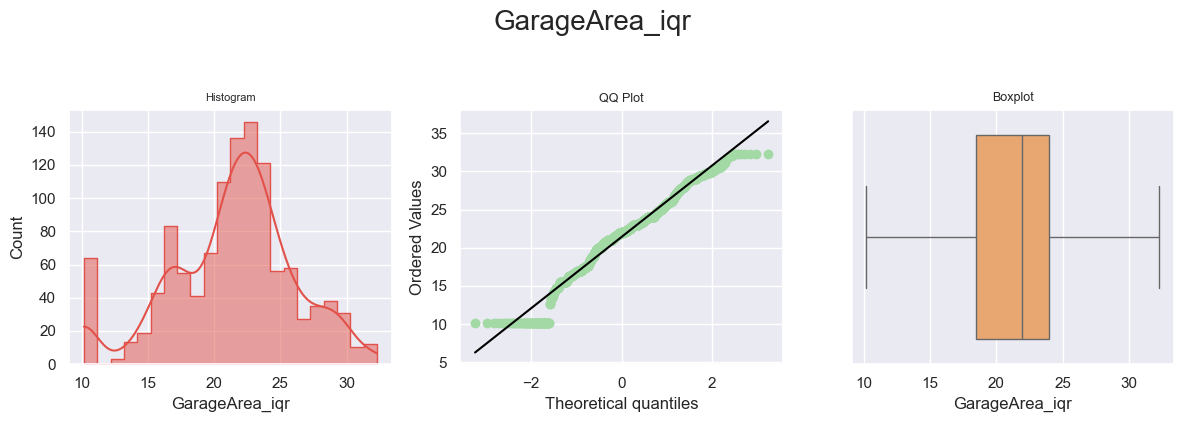



*** Variable Analyzed: LotArea
*** Applied transformation: ['LotArea_iqr'] 



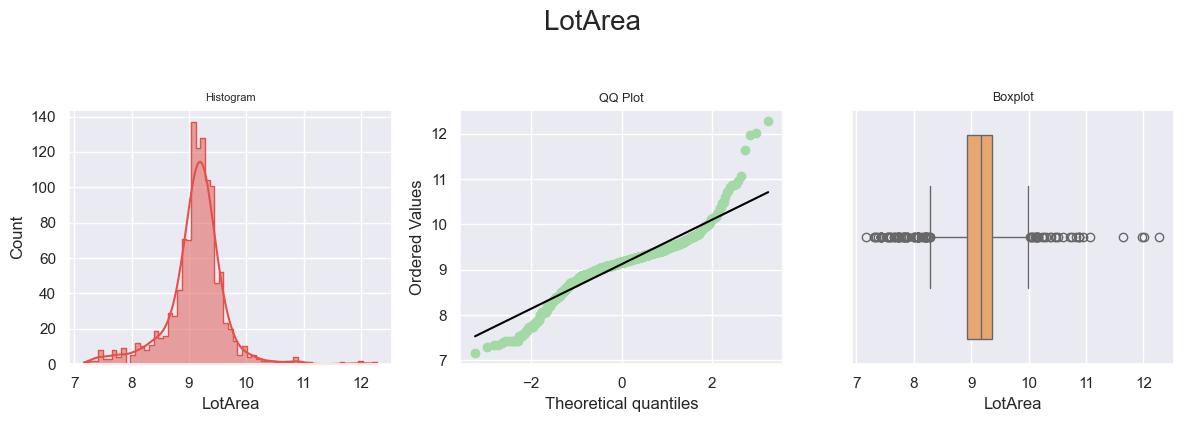

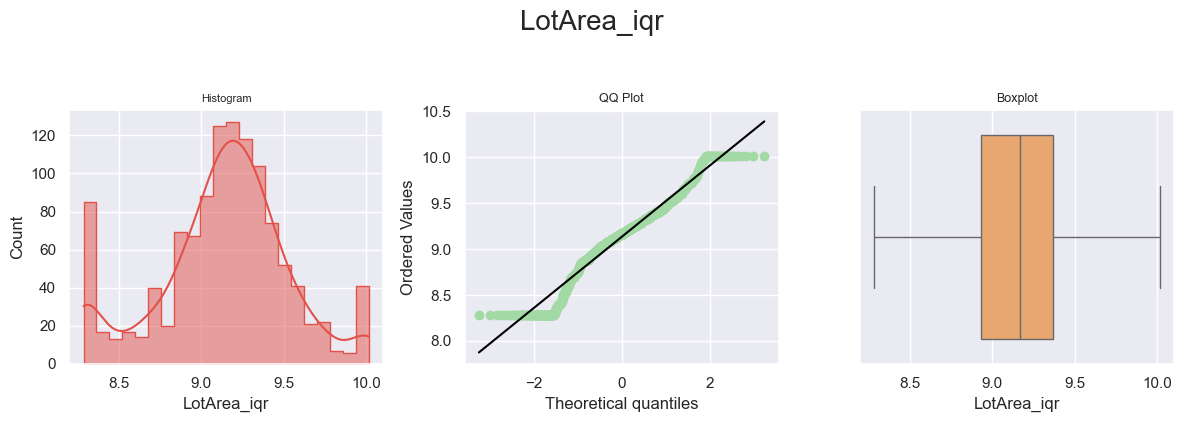



*** Variable Analyzed: LotFrontage
*** Applied transformation: ['LotFrontage_iqr'] 



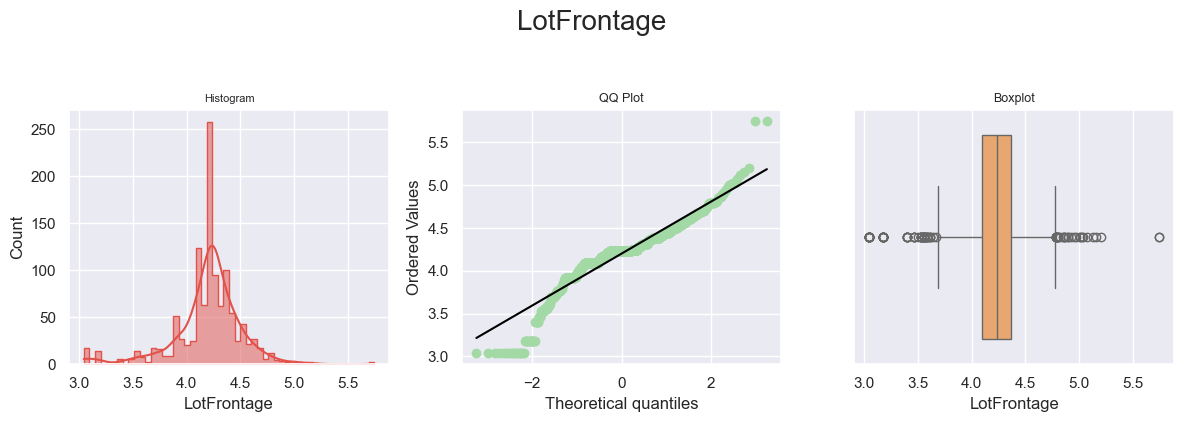

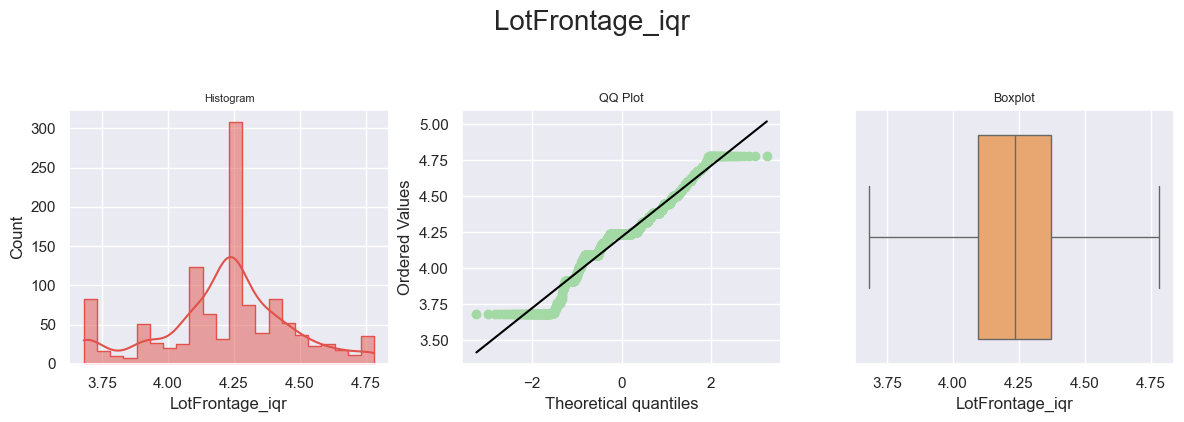



*** Variable Analyzed: MasVnrArea
*** Applied transformation: ['MasVnrArea_iqr'] 



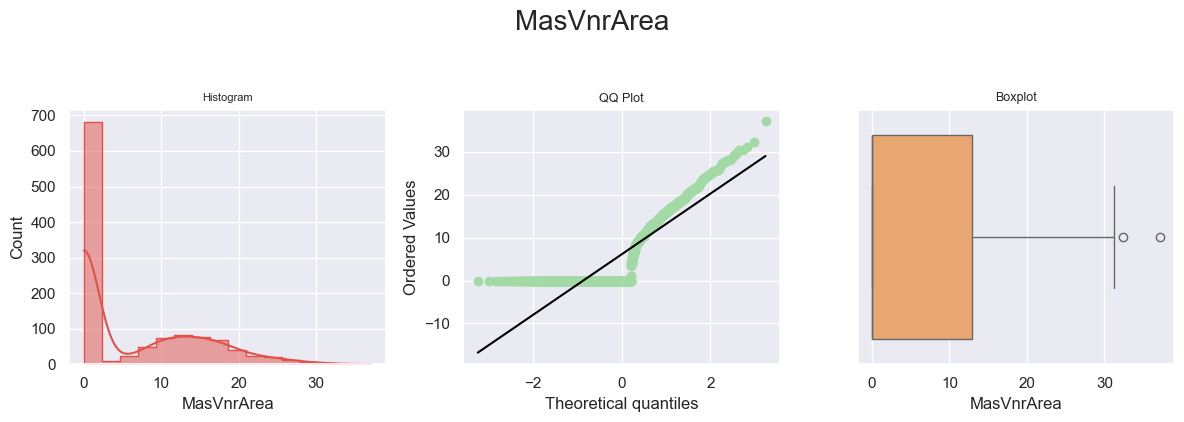

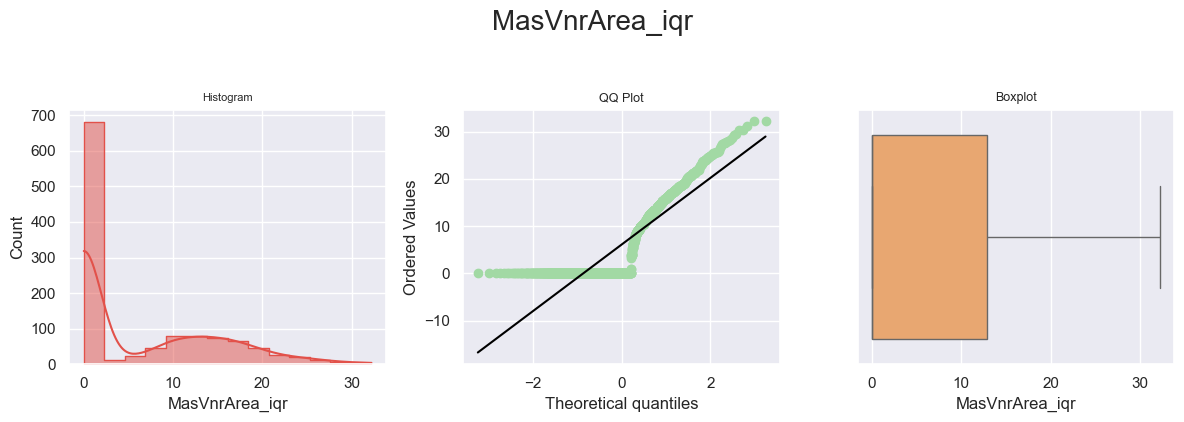



*** Variable Analyzed: OpenPorchSF
*** Applied transformation: ['OpenPorchSF_iqr'] 



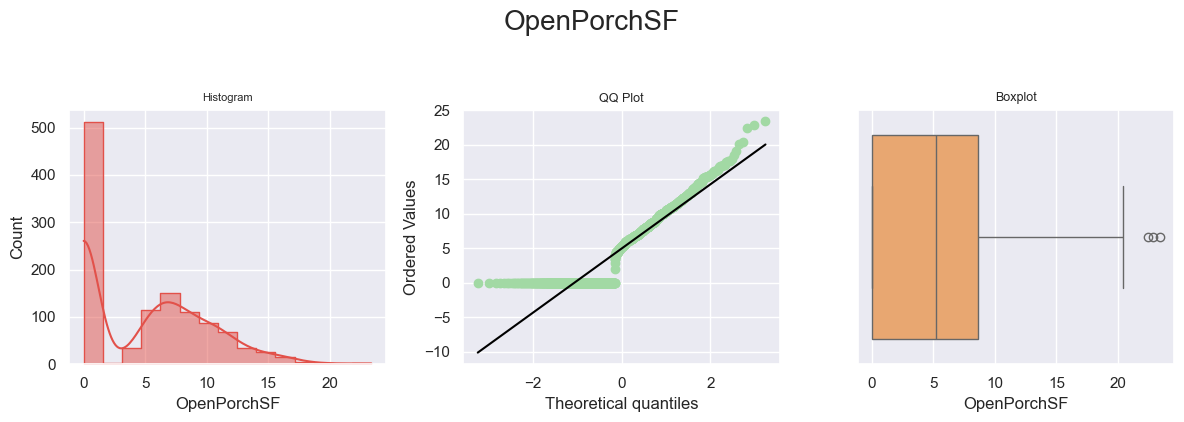

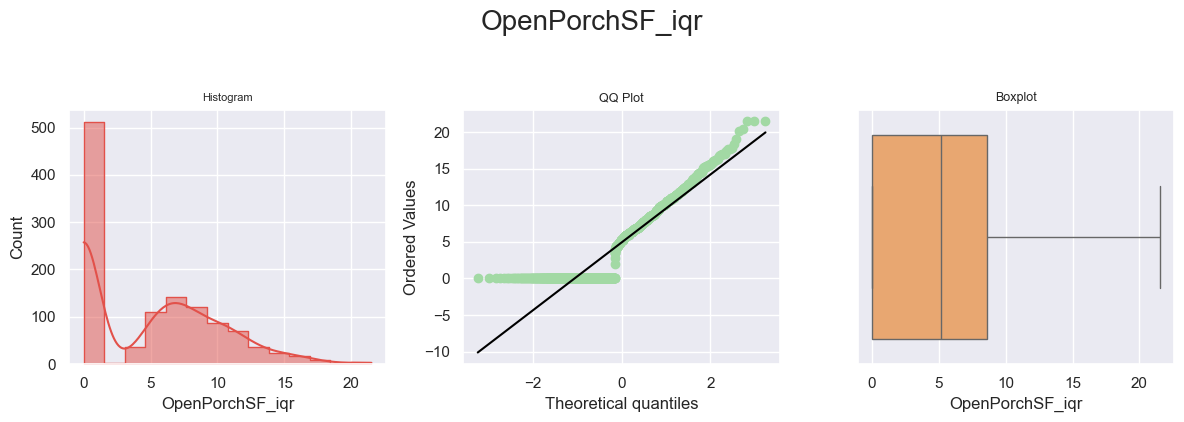



*** Variable Analyzed: TotalBsmtSF
*** Applied transformation: ['TotalBsmtSF_iqr'] 



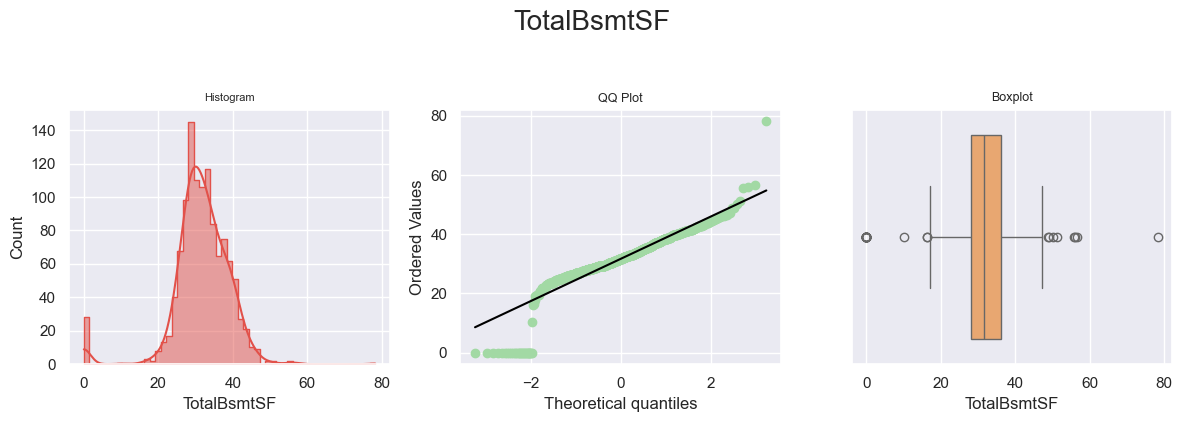

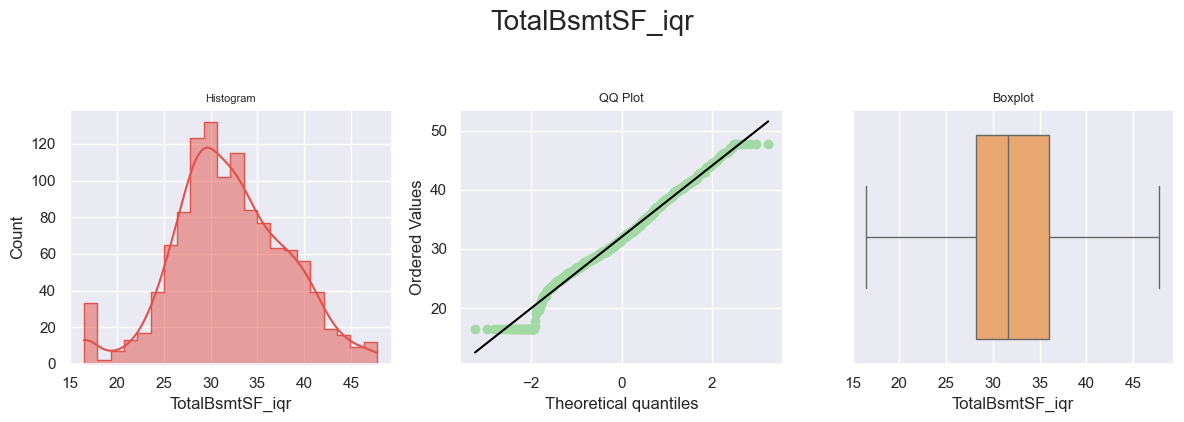



*** Variable Analyzed: 1stFlrSF
*** Applied transformation: ['1stFlrSF_iqr'] 



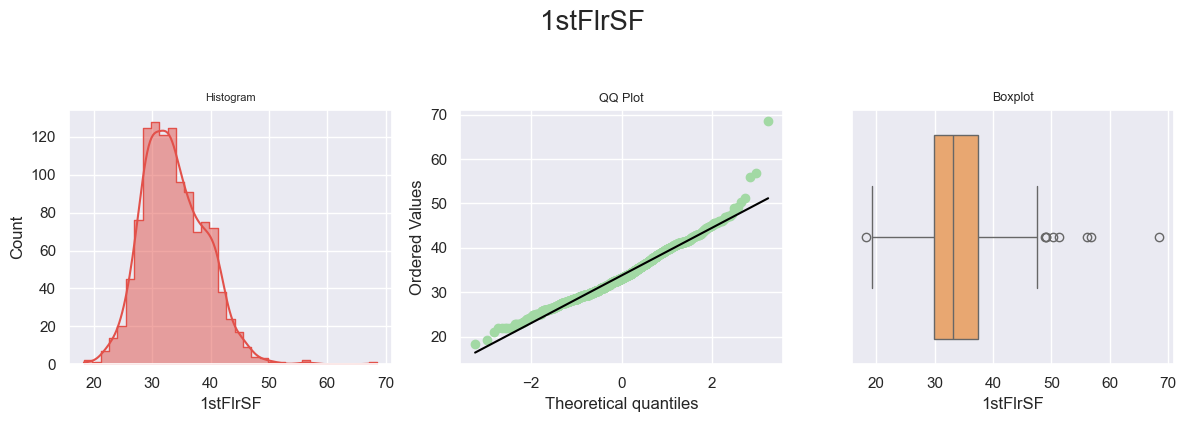

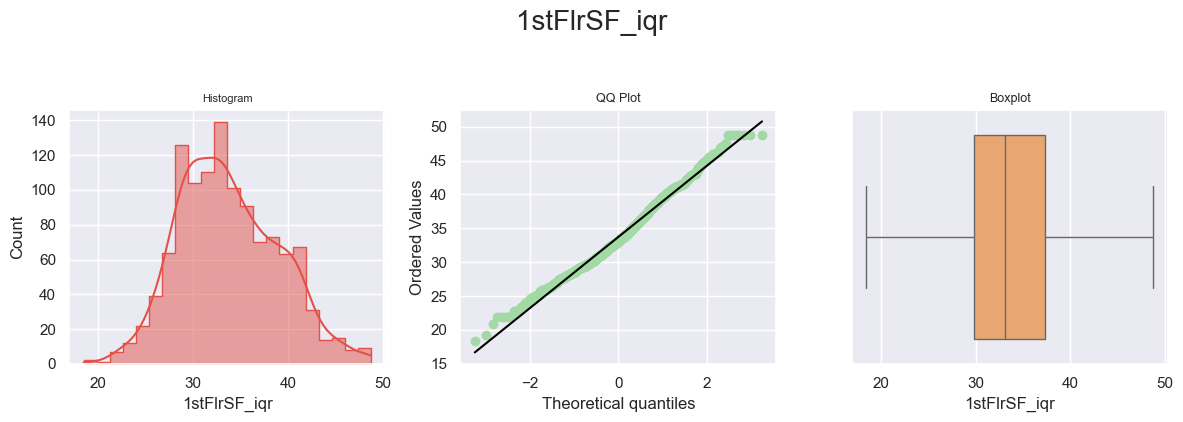



*** Variable Analyzed: 2ndFlrSF
*** Applied transformation: ['2ndFlrSF_iqr'] 



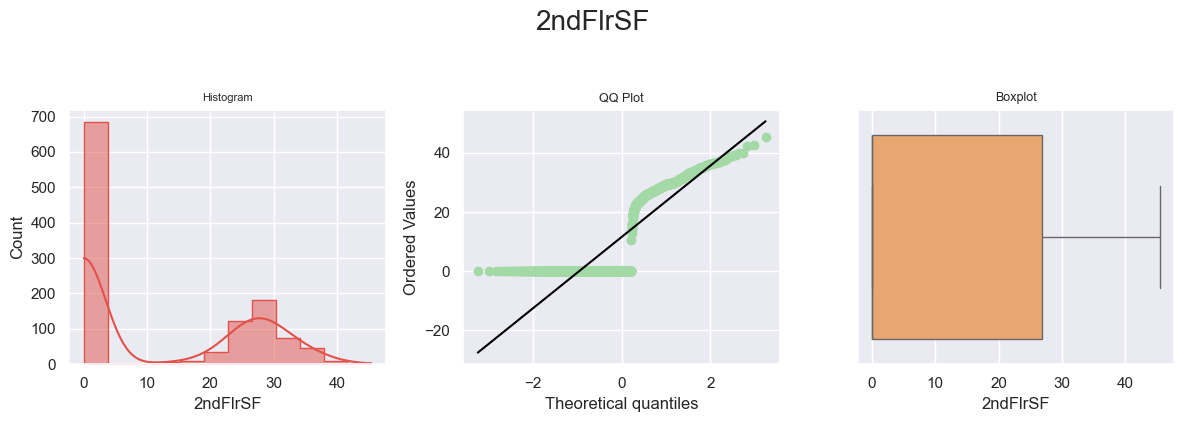

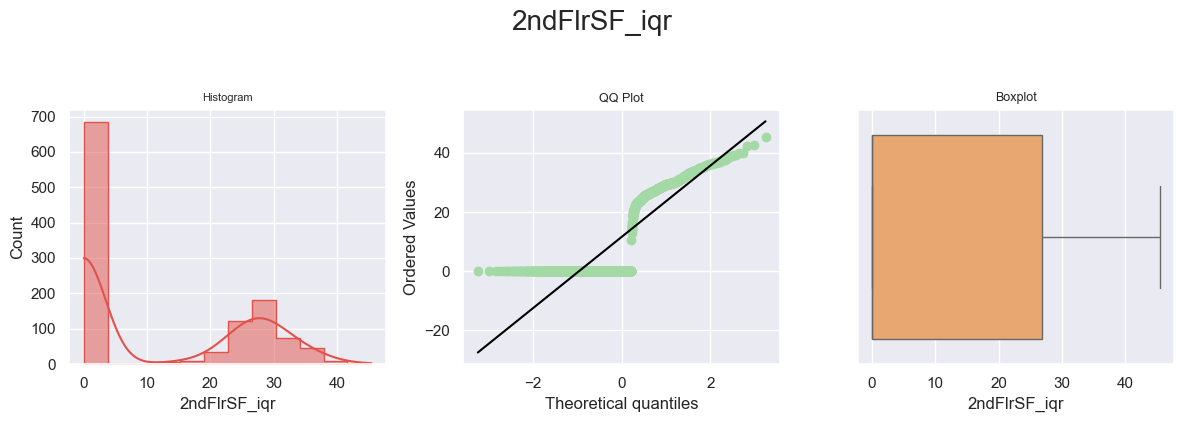

In [62]:
# Apply Winsorization and display diagnostic plots
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='outlier_winsorizer')

Apply the Winsorization to the Train and Test datasets.

In [63]:
# Apply Winsorization to Train and Test sets to cap extreme values
# This reduces the impact of outliers while preserving the overall distribution of the data.
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=variables_engineering)
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=variables_engineering)

# Fit the Winsorizer on the training set
TrainSet = winsorizer.fit_transform(TrainSet)
TestSet = winsorizer.transform(TestSet)

# Display confirmation message
print("*** Winsorization done!")

*** Winsorization done!


#### 2.2.4 Smart Correlation Selection

Highly correlated features can introduce multicollinearity, which negatively impacts regression models. Smart Correlation Selection identifies and removes redundant features based on `Spearman` correlation, retaining the most informative variables.

In [72]:
# Select variables to be engineered and display them
variables_engineering = TrainSet.columns
variables_engineering

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'GarageArea', 'GarageFinish',
       'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage',
       'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')

In [65]:
# Create separate DataFrame with selected variables
df_engineering = TrainSet[variables_engineering].copy()

# Display the first three rows of the new dataframe
df_engineering.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,36.249138,0.000000,3.0,0,922,0,392,17.146428,0,1957.0,...,9.035987,4.248495,0.0,0.000000,6,5,36.249138,1957,1957,145000
1,28.266588,27.784888,3.0,0,0,1,799,19.493589,0,1993.0,...,8.966611,4.077537,0.0,6.324555,7,6,28.266588,1993,1994,178000
2,28.213472,0.000000,2.0,0,0,1,796,10.165314,1,0.0,...,9.079890,4.204693,0.0,0.000000,7,5,28.213472,1910,1950,85000


In [66]:
# Import for feature selection to handle multicollinearity
from feature_engine.selection import SmartCorrelatedSelection

# Initialize SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.8, selection_method="variance")

# Fit and transform the data
df_engineering = corr_sel.fit_transform(df_engineering)

# Display the results of correlated features and features to drop
print("Correlated feature sets:", corr_sel.correlated_feature_sets_)
print("Features to drop:", corr_sel.features_to_drop_)

Correlated feature sets: [{'1stFlrSF', 'TotalBsmtSF'}, {'YearBuilt', 'GarageYrBlt'}, {'OverallQual', 'SalePrice'}]
Features to drop: ['1stFlrSF', 'OverallQual', 'YearBuilt']


In [67]:
# Update Train and Test sets with correlated features and dropped features
TrainSet = TrainSet[df_engineering.columns]
TestSet = TestSet[df_engineering.columns]

# Display confirmation message
print("*** Smart Correlation Selection done!")

*** Smart Correlation Selection done!


---

## Conclusion and Next Steps

### Conclusions
We successfully engineered features to improve the predictive power of the dataset and prepared it for regression modeling. Key steps included handling missing values, transforming numerical variables, encoding categorical variables, and addressing multicollinearity. These steps ensure the dataset is clean, well-structured, and ready for the next phase of model training and evaluation.

#### Key observations include:
1. **Categorical Encoding**: Ordinal encoding was applied to variables like `GarageFinish` and `KitchenQual`, preserving the natural order of categories. This ensures that the encoded values reflect the hierarchy of the original categories, which is critical for regression models.
2. **Numerical Transformations**: Log and power transformations effectively reduced skewness and stabilized variance in variables like `GrLivArea` and `LotArea`.
3. **Outlier Handling**: Winsorization successfully capped extreme values in variables like `GarageArea` and `MasVnrArea`, reducing their impact on the model.
4. **Feature Selection**: Smart Correlation Selection removed redundant features, ensuring the final dataset is free from multicollinearity.

### Next Steps: Model Training and Evaluation
1. **Model Training**: Train a regression model using the engineered features to predict house prices and experiment with different algorithms (e.g., linear regression, random forest) to identify the best-performing model.
2. **Model Evaluation**: Evaluate the model's performance using metrics like RMSE, MAE, and R². Additionally, perform cross-validation to ensure the model generalizes well to unseen data.
3. **Feature Importance Analysis**: Analyze the importance of the engineered features to understand their contribution to the model's predictions.